### Classification
This classification is done by ANN (neural network having 5 hidden nodes)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.process import get_data
from sklearn.utils import shuffle

In [16]:
def softmax(a) :
    aExp = np.exp(a)
    return aExp / aExp.sum(axis = 1, keepdims = True)

def forward(X, W1, b1, W2, b2) :
    z = np.tanh(X.dot(W1) + b1) #z = (N X M)
    return softmax(z.dot(W2) + b2), z  # y = (N X K)

def derivate_W2(T, Y, Z):
    return Z.T.dot(T - Y)

def derivate_b2(T, Y) :
    return np.sum(T - Y, axis = 0)

def derivate_W1(X, T, Y, W2, Z) :
    return X.T.dot((T - Y).dot(W2.T) * Z * (1- Z))  #if we take sigmoid function

def derivate_b1(T, Y, W2, Z): #same as W1 except for X(or if X was 1)
    return np.sum((T - Y).dot(W2.T) * Z * (1- Z), axis = 0)

def classification_rate(T, Y) :
    return np.mean(T == Y)

def cross_entropy(T, Y) :
    return - np.mean(T * np.log(Y))

def t2indicator(Yin) :
    N = Yin.shape[0]
    K = Yin.max() + 1
    Yout = np.zeros((N, K))
    
    for i in range(N) :
        Yout[i, Yin[i]] = 1
    return Yout

def predict(P_Y_given_X) :
    return np.argmax(P_Y_given_X, axis = 1)

0   0.5150470220333903   0.5012746870803406
1000   0.13193068144664868   0.14421575902845243
2000   0.0732866000023947   0.07536051926525351
3000   0.06702932589662218   0.06188139882295477
4000   0.06595850719113916   0.06409783556953713
5000   0.061227644136914304   0.06160912038777266
6000   0.05771133335756647   0.0546381136427787
7000   0.05635775095959616   0.05497543291218385
8000   0.05533019499981201   0.05639112469088925
9000   0.05338946349082538   0.05726502730607588
10000   0.05329400683680467   0.05619956092707325
11000   0.05236710648920335   0.055130193183610544
12000   0.05104808819527951   0.05241181479995504
13000   0.0495812140217468   0.051078307912150456
14000   0.049042016951637034   0.04856578681072117
15000   0.04825356630212294   0.048097760060254034
16000   0.05177907679520929   0.05194100374186113
17000   0.05169711712140525   0.05157885779392537
18000   0.050881098959951264   0.04982477213778475
19000   0.04885753802499398   0.04958624509339833
Final traini

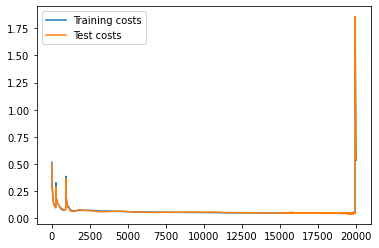

In [3]:
X, T = get_data()
X, T = shuffle(X, T)
T = T.astype(np.int32)

Xtrain = X[:-100]
Ttrain = T[:-100]
Ttrain_ind = t2indicator(Ttrain)

Xtest = X[-100:]
Ttest = T[-100:]
Ttest_ind = t2indicator(Ttest)

N = X.shape[0]
D = X.shape[1]
M = 5 #no of hidden nodes
K = len(set(T)) #no of classes

W1 = np.random.randn(D, M) / np.sqrt(D * K)
b1 = np.random.randn(M) / np.sqrt(M)
W2 = np.random.randn(M, K) /  np.sqrt(M * K)
b2 = np.random.randn(K) / np.sqrt(K)

#training
train_costs = []
test_costs = []
learning_rate = 0.001
epochs = 20000

for i in range(epochs) :
    Ytrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    Ytest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    ctrain = cross_entropy(Ttrain_ind, Ytrain)
    ctest = cross_entropy(Ttest_ind, Ytest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W1 += learning_rate * derivate_W1(Xtrain, Ttrain_ind, Ytrain, W2, Ztrain)
    b1 += learning_rate * derivate_b1(Ttrain_ind, Ytrain, W2, Ztrain)
    W2 += learning_rate * derivate_W2(Ttrain_ind, Ytrain, Ztrain)
    b2 += learning_rate * derivate_b2(Ttrain_ind, Ytrain)
    
    if i % 1000 == 0 :
        print(i, ' ', ctrain, ' ', ctest)
        
print('Final training classification rate : ', classification_rate(Ttrain, predict(Ytrain)))
print('Final testing classification rate : ', classification_rate(Ttest, predict(Ytest)))

plt.plot(train_costs, label = 'Training costs')
plt.plot(test_costs, label = 'Test costs')
plt.legend()

In [4]:
train_costs

[0.5150470220333903,
 0.44714931245662215,
 0.39380385144093977,
 0.3568609940149679,
 0.3330389909644189,
 0.31775878378112954,
 0.30750640711565136,
 0.30013079449369884,
 0.2944237216251204,
 0.28972388354608447,
 0.2856718826160824,
 0.2820801881540578,
 0.2788681663848578,
 0.27602583460636404,
 0.2735857527790699,
 0.2715943117114335,
 0.27008197154846864,
 0.2690380190813966,
 0.26839846554758173,
 0.26805352097735935,
 0.26787284221952795,
 0.26773697537525026,
 0.26756058828483886,
 0.26730033866409053,
 0.26695024688360774,
 0.2665317793720503,
 0.2660840352077837,
 0.2656557854992242,
 0.26529857223654263,
 0.2650591803846592,
 0.26497032383495006,
 0.26504008355959263,
 0.26524281929381155,
 0.2655154201253067,
 0.2657614469950019,
 0.2658625254038974,
 0.26569389200619203,
 0.2651410682139748,
 0.2641159812225236,
 0.26257094372697526,
 0.26050729714422005,
 0.2579747041890498,
 0.2550596604810444,
 0.25186688631501875,
 0.2485006301573103,
 0.24505171641040144,
 0.2415920

In [13]:
T.dtype

dtype('int32')

In [6]:
T

array([1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 2,
       1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 1, 2, 0, 2, 3, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       2, 0, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 3, 0, 1, 1, 0, 1, 3, 1, 2, 0,
       0, 0, 0, 1, 1, 3, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1,
       2, 3, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 3, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 3, 0, 0,
       1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 3, 0, 2, 0, 3, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 3, 2, 2, 1, 0, 0, 0, 1, 1, 1,

In [15]:
X.std()

0.661626594084609